<a href="https://colab.research.google.com/github/mdaugherity/ModernPhysics/blob/master/Modern_Hydrogen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modern - Hydrogen Atom

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp
from scipy import integrate
from scipy.optimize import root_scalar

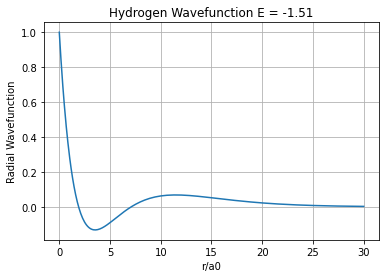

In [2]:
# Four Terms:  R''  = -2mc2/hbar2*E*R - 2mc2/hbar2*V/r*R - LL  + 2/r*R'
hbarc = 197.326   # ev nm
mc2 = 5.10999e5   # ev
a0 = .0529 #[nm]

k1 = 2*mc2 / hbarc**2  # constant 
V = 1.44  # e2/4*pi*eps0 [ev nm]
k2 = k1*V
L=0  # cent. force term skipping for now

def fun(x, y, E):
    ret = -k1*E*y[0] - k2*y[0]/x - 2*y[1]/x  # skipping ll term
    return [y[1], ret]

E = -13.6
E1 = -13.6062861999497  # energy solutions from root finding below
E2 = -3.4016249067620055
E3 = -1.5118330797209811
E = E3
sol = integrate.solve_ivp(fun, [1e-9,30*a0], [1,0], args=[E], rtol=1e-9,atol=1e-9)

plt.figure()
plt.plot(sol.t/a0, sol.y[0])
plt.xlabel('r/a0')
plt.ylabel('Radial Wavefunction')
plt.title(f'Hydrogen Wavefunction E = {E:0.2f}')
plt.grid()
plt.show()

Valid solutions must match the boundary condition of psi approaching zero as r->infinity.  So any energy that does this is a valid solution to the equation.

In [0]:
# Function that returns value at right edge for root finding
def endpoint(E):
    sol = integrate.solve_ivp(fun, [1e-9,50*a0], [1,0], args=[E], rtol=1e-9,atol=1e-9)
    return sol.y[0,-1]


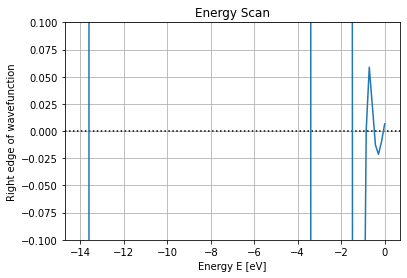

In [4]:
# Scan through energies looking for zero crossings
ERANGE = np.linspace(-14,0,num=100)
y = []
for E in ERANGE:
    y.append(endpoint(E))

plt.axhline(color='k', ls=':')
plt.plot(ERANGE, y)
plt.xlabel('Energy E [eV]')
plt.ylabel('Right edge of wavefunction')
plt.ylim((-0.1,0.1))
plt.title('Energy Scan')
plt.grid()

Every energy where y=0 is a solution.  Use the root finding function to get precise values

In [5]:
sol = root_scalar(endpoint, bracket=[-13,-14])
print(sol)
E1 = sol.root

      converged: True
           flag: 'converged'
 function_calls: 10
     iterations: 9
           root: -13.606499624259973


In [6]:
sol = root_scalar(endpoint, bracket=[-4,-3])
print(sol)
E2 = sol.root

      converged: True
           flag: 'converged'
 function_calls: 13
     iterations: 12
           root: -3.4016249067620055


In [7]:
sol = root_scalar(endpoint, bracket=[-2,-1])
print(sol)
E3 = sol.root

      converged: True
           flag: 'converged'
 function_calls: 11
     iterations: 10
           root: -1.5118330797209811


In [0]:
sol = integrate.solve_ivp(fun, [1e-9,30*a0], [1,0], args=[E1],rtol=1e-9,atol=1e-9)
y1 = sol.y[0]

sol = integrate.solve_ivp(fun, [1e-9,30*a0], [1,0], args=[E2],rtol=1e-9,atol=1e-9)
y2 = sol.y[0]

sol = integrate.solve_ivp(fun, [1e-9,30*a0], [1,0], args=[E3],rtol=1e-9,atol=1e-9)
y3 = sol.y[0]

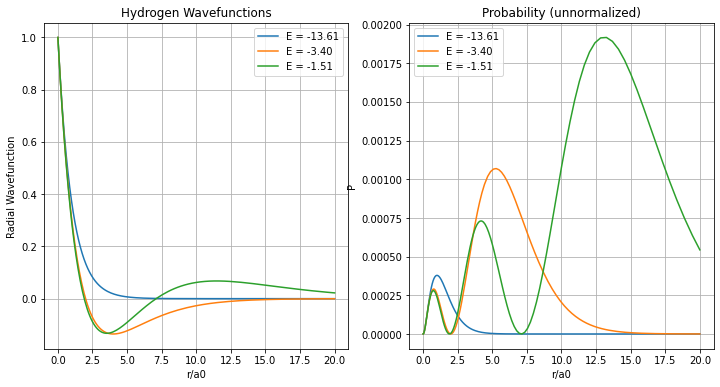

In [9]:
ELIST = [E1,E2,E3]
LABELS = ['N=1','N=2','N=3']
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)

for E in ELIST:
    sol = integrate.solve_ivp(fun, [1e-9,20*a0], [1,0], args=[E], rtol=1e-9,atol=1e-9)
    plt.plot(sol.t/a0, sol.y[0],label=f'E = {E:0.2f}')
plt.xlabel('r/a0')
plt.ylabel('Radial Wavefunction')
plt.title(f'Hydrogen Wavefunctions')
plt.legend()
plt.grid()

# This is really inefficient to calculate these twice, but it will have to do for now
plt.subplot(1,2,2)
for E in ELIST:
    sol = integrate.solve_ivp(fun, [1e-9,20*a0], [1,0], args=[E], rtol=1e-9,atol=1e-9)
    p = sol.y[0]**2 * sol.t**2
    plt.plot(sol.t/a0,p,label=f'E = {E:0.2f}')
plt.xlabel('r/a0')
plt.ylabel('P')
plt.title(f'Probability (unnormalized)')
plt.legend()
plt.grid()
plt.show()